In [ ]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import graphviz
import graphviz
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
graphviz.__version__ #注意双下划线



In [ ]:
决策树 ：
八个参数：Criterion，两个随机性相关的参数（random_state，splitter）
五个剪枝参数（max_depth,min_samples_split，min_samples_leaf，max_feature，min_impurity_decrease）
一个属性：feature_importances_
四个接口：fit，score，apply，predict

In [ ]:
# 决策树的分类模型
# 第1步： 数据的获取 
wine = load_wine() #wine.data 178 * 13
print(wine.feature_names)
print(wine.target_names)
#如果wine是一张表，应该长这样：
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1 )


Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
print(Xtrain.shape)  #训练数据
print(Xtest.shape)  #测试数据 
# 第2步： 模型的训练
clf = tree.DecisionTreeClassifier(criterion="entropy") # 回归树

clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #返回预测的准确度
print(score)
# 根据实际需要 写入特征名字 
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜\
色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

dot_data = tree.export_graphviz(clf
                               ,out_file = None
                               ,feature_names= feature_name
                               ,class_names=["琴酒","雪莉","贝尔摩德"]
                               ,filled=True
                               ,rounded=True
                               )
with open('Source.gv', encoding='utf-8') as f:
    dot_data = f.read()
dot = graphviz.Source(dot_data.replace("helvetica", "MicrosoftYaHei"))  
# 解决中文乱码replace("helvetica", "MicrosoftYaHei")或者 replace("helvetica", "simHei")
dot.view()
# graph = pydotplus.graph_from_dot_data(dot_data)
# graph = graphviz.Source(dot_data)
# Image(graph.create_png())
#特征重要性
clf.feature_importances_
[*zip(feature_name,clf.feature_importances_)]


clf = tree.DecisionTreeClassifier(criterion="entropy"
                                 ,random_state=30
                                 ,splitter="random" #  bset 选择最重要的特征进行分支
                                 )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

dot_data = tree.export_graphviz(clf
                               ,feature_names= feature_name
                               ,class_names=["琴酒","雪莉","贝尔摩德"]
                               ,filled=True
                               ,rounded=True
                               )  
graph = graphviz.Source(dot_data)
graph
 
# 第3步： 调参 
# 3 剪枝参数 它会在训练集上表现很好，在测试集上却表现糟糕。
#我们的树对训练集的拟合程度如何？
score_train = clf.score(Xtrain, Ytrain)
score_train
#  学习参数图像 
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                     ,criterion="entropy"
                                     ,random_state=30
                                     ,splitter="random"
                                     )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
    
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()


In [ ]:
# 第2个例子 分类任务 
data_path = r'C:\Users\Mrwang\Desktop\数学建模\train.csv'
data = pd.read_csv(data_path,index_col=0)
# data.head()
data.info()
# 对字符型变量或者离散型 进行 数字化 
# 对数据集进行预处理
#删除缺失值过多的列，和观察判断来说和预测的y没有关系的列
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)
#处理缺失值，对缺失值较多的列进行填补，有一些特征只确实一两个值，可以采取直接删除记录的方法
data["Age"] = data["Age"].fillna(data["Age"].mean())
data = data.dropna()
#将分类变量转换为数值型变量
#将二分类变量转换为数值型变量
#astype能够将一个pandas对象转换为某种类型，和apply(int(x))不同，astype可以将文本类转换为数字，用这个方式可以很便捷地将二分类特征转换为0~1
data["Sex"] = (data["Sex"]== "male").astype("int")
#将三分类变量转换为数值型变量
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))
#查看处理后的数据集
data.head()


X = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
#修正测试集和训练集的索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
    
#查看分好的训练集和测试集
Xtrain.head()


# 导入模型，粗略跑一下查看结果

clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score_ = clf.score(Xtest, Ytest)
score_
score = cross_val_score(clf,X,y,cv=10).mean()
print(score)
# 在不同max_depth下观察模型的拟合状况
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1
                                 ,criterion="entropy"
                               )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()
#这里为什么使用“entropy”？因为我们注意到，在最大深度=3的时候，模型拟合不足，在训练集和测试集上的表现接近，但却都不是非常理想，只能够达到83%左右，所以我们要使用entropy。


# 用网格搜索调整参数

gini_thresholds = np.linspace(0,0.5,20)
parameters = {'splitter':('best','random')
             ,'criterion':("gini","entropy")
             ,"max_depth":[*range(1,10)]
             ,'min_samples_leaf':[*range(1,50,5)]
             ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
             }
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)
GS.best_params_
GS.best_score_

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier


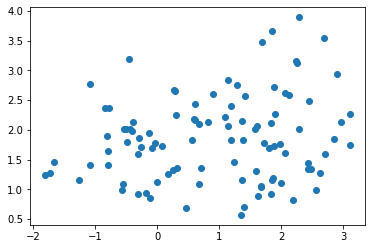

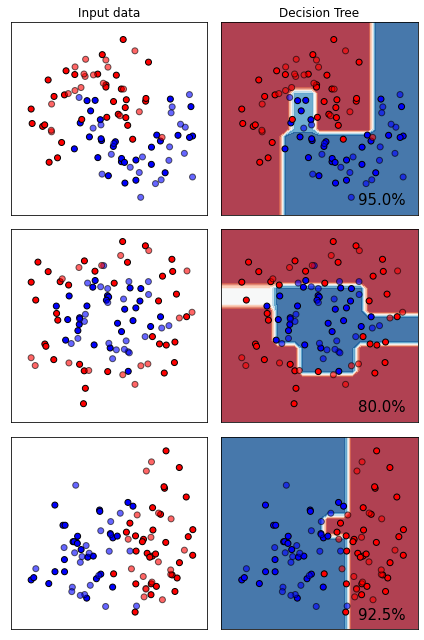

In [24]:
# 2. 生成三种数据集  实例：分类树在合成数集上的表现
#make_classification库生成随机的二分型数据
X, y = make_classification(n_samples=100, #生成100个样本
                           n_features=2,  #包含2个特征，即生成二维数据
                           n_redundant=0, #添加冗余特征0个
                           n_informative=2, #包含信息的特征是2个
                           random_state=1,  #随机模式1
                           n_clusters_per_class=1 #每个簇内包含的标签类别有1个
                         )
#在这里可以查看一下X和y，其中X是100行带有两个2特征的数据，y是二分类标签
#也可以画出散点图来观察一下X中特征的分布
# plt.scatter(X[:,0],X[:,1])
#从图上可以看出，生成的二分型数据的两个簇离彼此很远，这样不利于我们测试分类器的效果，因此我们使用np生成随机数组，通过让已经生成的二分型数据点加减0~1之间的随机数，使数据分布变得更散更稀疏
#注意，这个过程只能够运行一次，因为多次运行之后X会变得非常稀疏，两个簇的数据会混合在一起，分类器的效应会继续下降
rng = np.random.RandomState(2) #生成一种随机
X += 2 * rng.uniform(size=X.shape) #加减0~1之间的随机数
linearly_separable = (X, y) #生成了新的X，依然可以画散点图来观察一下特征的分布
plt.scatter(X[:,0],X[:,1])
#用make_moons创建月亮型数据，make_circles创建环形数据，并将三组数据打包起来放在列表datasets中
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

# 3. 画出三种数据集和三棵决策树的分类效应图像
#创建画布，宽高比为6*9
figure = plt.figure(figsize=(6, 9))
#设置用来安排图像显示位置的全局变量i
i = 1
#开始迭代数据，对datasets中的数据进行for循环
for ds_index, ds in enumerate(datasets):
    #对X中的数据进行标准化处理，然后分训练集和测试集
    X, y = ds
    X = StandardScaler().fit_transform(X) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    #找出数据集中两个特征的最大值和最小值，让最大值+0.5，最小值-0.5，创造一个比两个特征的区间本身更大一点的区间
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    #用特征向量生成网格数据，网格数据，其实就相当于坐标轴上无数个点
    #函数np.arange在给定的两个数之间返回均匀间隔的值，0.2为步长
    #函数meshgrid用以生成网格数据，能够将两个一维数组生成两个二维矩阵。
    #如果第一个数组是narray，维度是n，第二个参数是marray，维度是m。那么生成的第一个二维数组是以narray为行，m行的矩阵，而第二个二维数组是以marray的转置为列，n列的矩阵
    #生成的网格数据，是用来绘制决策边界的，因为绘制决策边界的函数contourf要求输入的两个特征都必须是二维的
    array1,array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2),
                         np.arange(x2_min, x2_max, 0.2))
      #接下来生成彩色画布
    #用ListedColormap为画布创建颜色，#FF0000正红，#0000FF正蓝
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    #在画布上加上一个子图，数据为len(datasets)行，2列，放在位置i上
    ax = plt.subplot(len(datasets), 2, i)
    
    #到这里为止，已经生成了0~1之间的坐标系3个了，接下来为我们的坐标系放上标题
    #我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件
    if ds_index == 0:
        ax.set_title("Input data")
    
    #将数据集的分布放到我们的坐标系上
    #先放训练集
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
               cmap=cm_bright,edgecolors='k')
    #放测试集
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, 
               cmap=cm_bright, alpha=0.6,edgecolors='k')
    
     #为图设置坐标轴的最大值和最小值，并设定没有坐标轴
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    #每次循环之后，改变i的取值让图每次位列不同的位置
    i += 1
    
    #至此为止，数据集本身的图像已经布置完毕，运行以上的代码，可以看见三个已经处理好的数据集
    
    #############################从这里开始是决策树模型##########################
    
    #迭代决策树，首先用subplot增加子图，subplot(行，列，索引)这样的结构，并使用索引i定义图的位置
    #在这里，len(datasets)其实就是3，2是两列
    #在函数最开始，我们定义了i=1，并且在上边建立数据集的图像的时候，已经让i+1,所以i在每次循环中的取值是2，4，6
    ax = plt.subplot(len(datasets),2,i)
    
    #决策树的建模过程：实例化 → fit训练 → score接口得到预测的准确率
    clf = DecisionTreeClassifier(max_depth=5)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    #绘制决策边界，为此，我们将为网格中的每个点指定一种颜色[x1_min，x1_max] x [x2_min，x2_max]
    #分类树的接口，predict_proba，返回每一个输入的数据点所对应的标签类概率
    #类概率是数据点所在的叶节点中相同类的样本数量/叶节点中的样本总数量
    #由于决策树在训练的时候导入的训练集X_train里面包含两个特征，所以我们在计算类概率的时候，也必须导入结构相同的数组，即是说，必须有两个特征
    #ravel()能够将一个多维数组转换成一维数组
    #np.c_是能够将两个数组组合起来的函数
       #在这里，我们先将两个网格数据降维降维成一维数组，再将两个数组链接变成含有两个特征的数据，再带入决策树模型，生成的Z包含数据的索引和每个样本点对应的类概率，再切片，切出类概率
    Z = clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[:, 1]
    
    #np.c_[np.array([1,2,3]), np.array([4,5,6])]
    
    #将返回的类概率作为数据，放到contourf里面绘制去绘制轮廓
    Z = Z.reshape(array1.shape)
    ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)
    
    #将数据集的分布放到我们的坐标系上
    # 将训练集放到图中去
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # 将测试集放到图中去
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)
    
    #为图设置坐标轴的最大值和最小值
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    #设定坐标轴不显示标尺也不显示数字
    ax.set_xticks(())
    ax.set_yticks(())
    
    #我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件
    if ds_index == 0:
        ax.set_title("Decision Tree")
    
    #写在右下角的数字    
    ax.text(array1.max() - .3, array2.min() + .3, ('{:.1f}%'.format(score*100)),
            size=15, horizontalalignment='right')
    
    #让i继续加一
    i += 1
plt.tight_layout()
plt.show()

